In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import statsmodels.formula.api as smf

### Functional analysis of transcriptomics data from SARS-CoV-2 infected cell lines

Data is from [GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)

You need to upload the data files (from Google Drive link) to the *content* directory of your Colab enviroment. If you run this localy, you have to change the path to files according to your enviroment.

In [4]:
data = pd.read_csv('/content/GSE147507_RawReadCounts_Human.csv',
                   sep=',', header=0, index_col=0)

In [5]:
data.head()

,GSM4432378,GSM4432379,GSM4432380,GSM4432381,GSM4432382,GSM4432383,GSM4432384,GSM4432385,GSM4432386,GSM4432387,GSM4432388,GSM4432389,GSM4432390,GSM4432391,GSM4432392,GSM4432393,GSM4432394,GSM4432395,GSM4432396,GSM4432397,GSM4462336,GSM4462337,GSM4462338,GSM4462339,GSM4462340,GSM4462341,GSM4462342,GSM4462343,GSM4462344,GSM4462345,GSM4462346,GSM4462347,GSM4462348,GSM4462349,GSM4462350,GSM4462351,GSM4462352,GSM4462353,GSM4462354,GSM4462355,GSM4462356,GSM4462357,GSM4462358,GSM4462359,GSM4462360,GSM4462361,GSM4462362,GSM4462363,GSM4462364,GSM4462365,GSM4462366,GSM4462367,GSM4462368,GSM4462369,GSM4462370,GSM4462371,GSM4462372,GSM4462373,GSM4462374,GSM4462375,GSM4462376,GSM4462377,GSM4462378,GSM4462379,GSM4462380,GSM4462413,GSM4462414,GSM4462415,GSM4462416
DDX11L1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
WASH7P,29,24,23,34,19,44,68,43,33,65,79,48,184,128,51,43,15,12,3,3,64,53,37,38,47,65,37,4,22,1,2,4,25,60,84,47,32,41,68,17,21,18,9,28,14,23,12,57,58,53,89,102,26,21,7,41,56,36,131,72,66,46,35,48,46,140,261,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
meta = pd.read_csv('/content/meta.csv', 
                   sep=',', header=0, index_col=0)

In [7]:
meta.head()

,ID,Series,Replicate,Cell,Treatment
!Sample_geo_accession,,,,,
GSM4432378,Series1_NHBE_Mock_1,Series1,1,NHBE,Mock
GSM4432379,Series1_NHBE_Mock_2,Series1,2,NHBE,Mock
GSM4432380,Series1_NHBE_Mock_3,Series1,3,NHBE,Mock
GSM4432381,Series1_NHBE_SARS-CoV-2_1,Series1,1,NHBE,SARS-CoV-2
GSM4432382,Series1_NHBE_SARS-CoV-2_2,Series1,2,NHBE,SARS-CoV-2


In [8]:
np.sum(meta.index != data.columns)

0

In [9]:
meta['Cell'].value_counts()

A549         29
NHBE         24
A549-ACE2     6
Calu3         6
Lung          4
Name: Cell, dtype: int64

In [10]:
meta['Treatment'].value_counts()

Mock          26
SARS-CoV-2    15
IAV            6
IFNB           6
RSV            5
IAVdNS1        4
HPIV3          3
Helathy        2
COVID          2
Name: Treatment, dtype: int64

### Basic exploratory analysis with PCA

(array([25., 22., 13.,  4.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([  0. ,  26.1,  52.2,  78.3, 104.4, 130.5, 156.6, 182.7, 208.8,
        234.9, 261. ]),
 <a list of 10 Patch objects>)

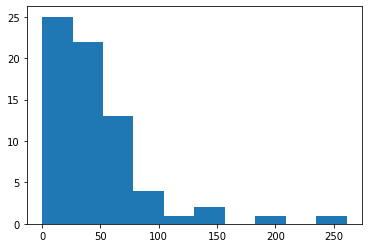

In [11]:
plt.hist(data.loc['WASH7P'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


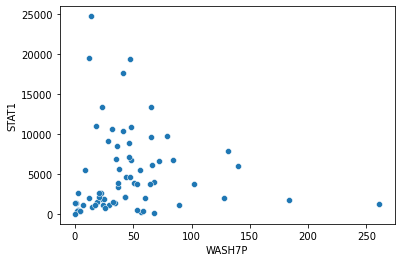

In [12]:
sns.scatterplot(data.loc['WASH7P'], data.loc['STAT1'])

(array([31., 12., 10.,  6.,  4.,  2.,  0.,  3.,  0.,  1.]),
 array([   48. ,  2519.9,  4991.8,  7463.7,  9935.6, 12407.5, 14879.4,
        17351.3, 19823.2, 22295.1, 24767. ]),
 <a list of 10 Patch objects>)

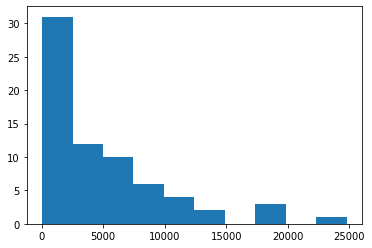

In [13]:
plt.hist(data.loc['STAT1'])

In [14]:
data_log = np.log2(data+1)

(array([ 1.,  1.,  0.,  7.,  2., 16., 10., 16., 10.,  6.]),
 array([ 5.61470984,  6.51285784,  7.41100583,  8.30915382,  9.20730181,
        10.1054498 , 11.00359779, 11.90174578, 12.79989377, 13.69804176,
        14.59618976]),
 <a list of 10 Patch objects>)

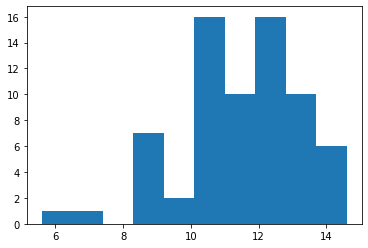

In [15]:
plt.hist(data_log.loc['STAT1'])

In [16]:
data.shape

(21797, 69)

In [17]:
model = PCA(2)

In [18]:
data_pca = model.fit_transform(data_log.T)

In [19]:
data_pca = pd.DataFrame(data_pca, index=data_log.columns, columns=['PC1', 'PC2'])

In [20]:
data_pca.head()

,PC1,PC2
GSM4432378,-13.690608,147.296348
GSM4432379,-6.671994,145.076016
GSM4432380,-81.084610,163.530645
GSM4432381,1.062988,145.362777
GSM4432382,9.187713,145.939652


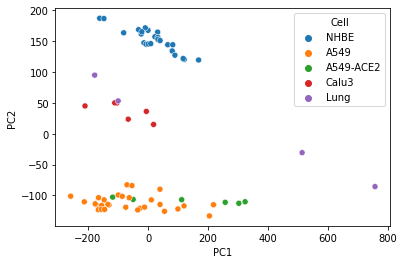

In [21]:
sns.scatterplot(x=data_pca['PC1'], y=data_pca['PC2'], hue=meta['Cell'])

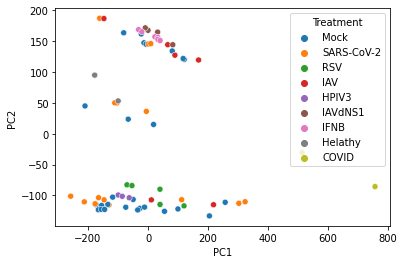

In [22]:
sns.scatterplot(x=data_pca['PC1'], y=data_pca['PC2'], hue=meta['Treatment'])

In [23]:
meta['Total_count'] = data.sum()

In [24]:
meta.head()

,ID,Series,Replicate,Cell,Treatment,Total_count
!Sample_geo_accession,,,,,,
GSM4432378,Series1_NHBE_Mock_1,Series1,1,NHBE,Mock,11258863
GSM4432379,Series1_NHBE_Mock_2,Series1,2,NHBE,Mock,10256909
GSM4432380,Series1_NHBE_Mock_3,Series1,3,NHBE,Mock,16601859
GSM4432381,Series1_NHBE_SARS-CoV-2_1,Series1,1,NHBE,SARS-CoV-2,10195139
GSM4432382,Series1_NHBE_SARS-CoV-2_2,Series1,2,NHBE,SARS-CoV-2,9904002


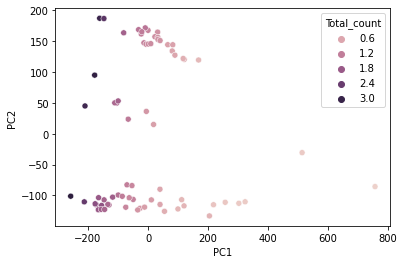

In [25]:
sns.scatterplot(x=data_pca['PC1'], y=data_pca['PC2'], hue=meta['Total_count'])

In [26]:
### normalizálás
data_norm = data / data.sum()

In [27]:
data_norm.sum()

GSM4432378    1.0
GSM4432379    1.0
GSM4432380    1.0
GSM4432381    1.0
GSM4432382    1.0
             ... 
GSM4462380    1.0
GSM4462413    1.0
GSM4462414    1.0
GSM4462415    1.0
GSM4462416    1.0
Length: 69, dtype: float64

In [28]:
data_lognorm = np.log2(data_norm+1)

In [29]:
model = PCA(2)
data_pca = model.fit_transform(data_lognorm.T)
data_pca = pd.DataFrame(data_pca, index=data_log.columns, columns=['PC1', 'PC2'])

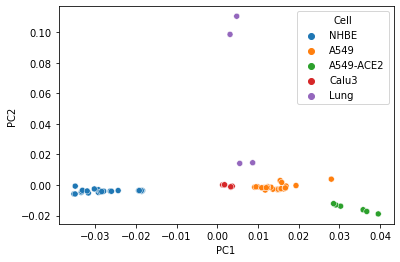

In [30]:
sns.scatterplot(x=data_pca['PC1'], y=data_pca['PC2'], hue=meta['Cell'])

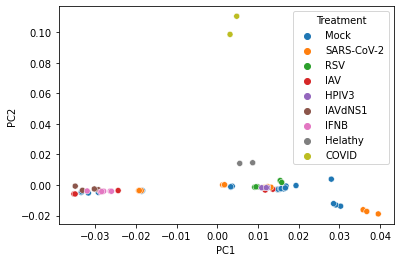

In [31]:
sns.scatterplot(x=data_pca['PC1'], y=data_pca['PC2'], hue=meta['Treatment'])

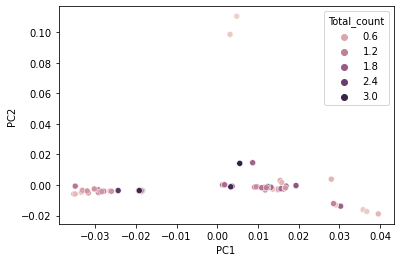

In [32]:
sns.scatterplot(x=data_pca['PC1'], y=data_pca['PC2'], hue=meta['Total_count'])

In [33]:
### mock / SARS-CoV-2
fil = np.in1d(meta['Treatment'], ['Mock', 'SARS-CoV-2'])

In [34]:
meta = meta[fil]
data_lognorm = data_lognorm[meta.index]

In [35]:
meta.shape

(41, 6)

### Basics of statistical modelling

In [36]:
toy = pd.DataFrame(index=['A','B','C','D','E','F'], columns=['Meas', 'Group'])
toy['Group'] = ['A','A','A','B','B','B']
np.random.seed(310)
toy.loc[['A','B','C'], 'Meas'] = np.random.normal(0, 1, size=3)
toy.loc[['D','E','F'], 'Meas'] = np.random.normal(2, 1, size=3)

In [37]:
toy['Meas'] = toy['Meas'].astype(float)

In [38]:
toy

,Meas,Group
A,0.535345,A
B,1.011563,A
C,0.072301,A
D,2.310777,B
E,1.311854,B
F,3.039524,B


In [39]:
from scipy.stats import ttest_ind

In [40]:
ttest_ind(toy.loc[['A','B','C'], 'Meas'], toy.loc[['D','E','F'], 'Meas'])

Ttest_indResult(statistic=-2.9518758073398517, pvalue=0.04189116133418951)

In [41]:
model = smf.ols('Meas ~ Group', data=toy).fit()

In [42]:
model.params

Intercept     0.539737
Group[T.B]    1.680982
dtype: float64

In [43]:
model.pvalues

Intercept     0.251185
Group[T.B]    0.041891
dtype: float64

In [44]:
### genek

In [45]:
### remove all 0s
fil = data_lognorm.std(1) != 0.0
data_lognorm = data_lognorm[fil]

In [46]:
### sorok a mintak
data_stat = pd.concat([data_lognorm.T, meta[['Cell','Treatment']]], 1)

In [47]:
model = smf.ols('STAT1 ~ Treatment', data=data_stat).fit()

In [48]:
model.params

Intercept                  0.000254
Treatment[T.SARS-CoV-2]    0.000509
dtype: float64

In [49]:
model.pvalues

Intercept                  0.000682
Treatment[T.SARS-CoV-2]    0.000065
dtype: float64

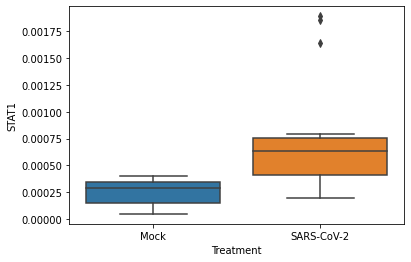

In [50]:
sns.boxplot(x=data_stat['Treatment'], y=data_stat['STAT1'])

In [51]:
model = smf.ols('STAT1 ~ Treatment + Cell + Treatment:Cell', data=data_stat).fit()


In [52]:
model.pvalues

Intercept                                    8.728626e-12
Treatment[T.SARS-CoV-2]                      7.114736e-07
Cell[T.A549-ACE2]                            3.525895e-01
Cell[T.Calu3]                                5.786405e-01
Cell[T.NHBE]                                 3.802461e-03
Treatment[T.SARS-CoV-2]:Cell[T.A549-ACE2]    9.874523e-01
Treatment[T.SARS-CoV-2]:Cell[T.Calu3]        5.024768e-14
Treatment[T.SARS-CoV-2]:Cell[T.NHBE]         1.393664e-02
dtype: float64

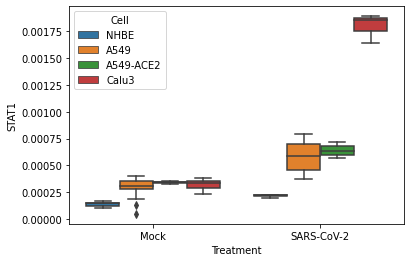

In [53]:
sns.boxplot(x=data_stat['Treatment'], y=data_stat['STAT1'], hue=meta['Cell'])

In [54]:
data_stat.head()

,DDX11L1,WASH7P,LOC729737,LOC100133331,LOC100288069,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,RNF223,C1orf159,MIR200B,MIR200A,MIR429,TTLL10,TNFRSF18,TNFRSF4,SDF4,B3GALT6,UBE2J2,SCNN1D,ACAP3,PUSL1,TAS1R3,DVL1,MXRA8,AURKAIP1,CCNL2,LOC148413,MRPL20,ANKRD65,TMEM88B,VWA1,ATAD3C,ATAD3B,...,DKC1,SNORA36A,SNORA56,MPP1,SMIM9,F8,F8A1,FUNDC2,CMC4,MTCP1,BRCC3,VBP1,RAB39B,CLIC2,TMLHE-AS1,TMLHE,SPRY3,VAMP7,IL9R,RPS4Y1,ZFY,LINC00278,TGIF2LY,PRKY,GYG2P1,TTTY15,USP9Y,DDX3Y,UTY,TMSB4Y,NLGN4Y,NLGN4Y-AS1,TTTY14,CD24,BCORP1,KDM5D,EIF1AY,RPS4Y2,Cell,Treatment
!Sample_geo_accession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4432378,0.0,0.000004,0.000014,0.000002,0.000002,0.000001,0.000000e+00,1.409524e-06,0.000227,0.000014,0.000022,0.000003,0.000006,0.000370,8.969700e-07,0.000006,0.0,0.000000e+00,3.844158e-07,0.0,0.000000e+00,0.000000e+00,0.000196,0.000026,0.000035,8.969700e-07,0.000039,0.000010,1.025109e-06,0.000070,0.000002,0.000051,0.000119,0.000025,0.000085,0.000031,0.0,0.000028,0.000001,0.000020,...,0.000145,0.0,2.562772e-07,0.000004,0.0,0.000002,0.000016,0.000064,0.000003,1.793939e-06,0.000083,0.000013,0.000000e+00,3.844158e-07,0.0,0.000018,0.000002,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002382,0.0,0.0,0.0,0.0,NHBE,Mock
GSM4432379,0.0,0.000003,0.000017,0.000003,0.000002,0.000002,0.000000e+00,2.813116e-06,0.000247,0.000019,0.000024,0.000007,0.000007,0.000503,5.626236e-07,0.000011,0.0,1.406559e-07,1.265903e-06,0.0,0.000000e+00,0.000000e+00,0.000221,0.000023,0.000038,1.406559e-06,0.000048,0.000011,1.406559e-07,0.000092,0.000003,0.000056,0.000157,0.000020,0.000076,0.000042,0.0,0.000038,0.000001,0.000031,...,0.000128,0.0,0.000000e+00,0.000003,0.0,0.000002,0.000015,0.000059,0.000003,7.032795e-07,0.000078,0.000018,0.000000e+00,2.813118e-07,0.0,0.000017,0.000001,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002818,0.0,0.0,0.0,0.0,NHBE,Mock
GSM4432380,0.0,0.000002,0.000010,0.000003,0.000002,0.000002,8.689961e-08,6.951967e-07,0.000222,0.000011,0.000022,0.000005,0.000004,0.000360,7.820963e-07,0.000007,0.0,2.606988e-07,1.216594e-06,0.0,8.689961e-08,0.000000e+00,0.000172,0.000019,0.000036,1.737991e-06,0.000041,0.000011,3.475984e-07,0.000066,0.000001,0.000055,0.000118,0.000021,0.000064,0.000033,0.0,0.000028,0.000002,0.000025,...,0.000135,0.0,0.000000e+00,0.000006,0.0,0.000003,0.000012,0.000058,0.000004,1.303494e-06,0.000091,0.000033,0.000000e+00,2.606988e-07,0.0,0.000016,0.000003,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003150,0.0,0.0,0.0,0.0,NHBE,Mock
GSM4432381,0.0,0.000005,0.000018,0.000002,0.000003,0.000002,0.000000e+00,3.679207e-06,0.000271,0.000024,0.000026,0.000004,0.000012,0.000521,8.490485e-07,0.000012,0.0,4.245243e-07,4.245243e-07,0.0,1.415081e-07,1.415081e-07,0.000260,0.000018,0.000039,1.698097e-06,0.000051,0.000015,0.000000e+00,0.000104,0.000004,0.000073,0.000148,0.000022,0.000073,0.000036,0.0,0.000051,0.000002,0.000041,...,0.000136,0.0,1.415081e-07,0.000004,0.0,0.000002,0.000013,0.000067,0.000002,1.132065e-06,0.000065,0.000015,2.830162e-07,2.830162e-07,0.0,0.000011,0.000003,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002211,0.0,0.0,0.0,0.0,NHBE,SARS-CoV-2
GSM4432382,0.0,0.000003,0.000012,0.000003,0.000001,0.000001,1.456679e-07,1.456678e-06,0.000234,0.000011,0.000017,0.000002,0.000007,0.000299,5.826714e-07,0.000005,0.0,1.456679e-07,2.913357e-07,0.0,0.000000e+00,0.000000e+00,0.000179,0.000021,0.000034,1.165343e-06,0.000037,0.000008,0.000000e+00,0.000058,0.000002,0.000052,0.000126,0.000018,0.000072,0.000025,0.0,0.000024,0.000002,0.000025,...,0.000158,0.0,0.000000e+00,0.000004,0.0,0.000001,0.000018,0.000062,0.000002,8.740071e-07,0.000082,0.000016,0.000000e+00,0.000000e+00,0.0,0.000017,0.000004,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002345,0.0,0.0,0.0,0.0,NHBE,SARS-CoV-2


In [60]:
good_columns = [x for x in data_stat.columns if ('-' not in x)&('.' not in x)]

In [61]:
data_stat = data_stat[good_columns]

In [62]:
results = pd.DataFrame(index=data_stat.columns[0:-2],
                       columns=['Pval', 'Param'])

In [63]:
### takes a few minutes
for gene in data_stat.columns[0:-2]:
  model = smf.ols(gene + ' ~ Cell + Treatment', data=data_stat).fit()
  results.loc[gene] = model.pvalues['Treatment[T.SARS-CoV-2]'], model.params['Treatment[T.SARS-CoV-2]']

In [64]:
#### you can see some immune related genes in the most significantly diferentially expressed genes
results['Pval'].sort_values().head(20)

SOD2         3.27327e-11
NFKB1        5.92577e-10
PRDM1        2.23405e-09
TNFAIP3       2.6665e-09
ZC3H12C       1.4681e-08
TGM2         2.97442e-08
CDCP1        5.51466e-08
DRAM1        8.33446e-08
PEBP1        1.01272e-07
TNIP1         1.1051e-07
IRF9         1.55259e-07
IRAK2        1.66569e-07
RAB40B       1.78586e-07
TRIM25       2.15561e-07
WTAP         3.38603e-07
COMMD9       3.40987e-07
PDZD11       3.73934e-07
TNFRSF10B    3.76113e-07
SLC38A10     4.10459e-07
BPGM         4.15498e-07
Name: Pval, dtype: object

### Homework

* Calculate coefficients (for SARS-CoV-2 treatment) for Calu-3 and A549 cells, and plot them (scatter plot) against each other. This will show us how similar are the response of these cells to infection. You will have to filter for these data (have 2 DataFrames, containing Mock and SARS-CoV-2 infected samples, and either Calu-3 or A549 cell lines), and run a statistical model with only 'Treatment' factor (basically it is a t-test).
* Please upload this notbook (your_name.ipynb) to the Week6 folder (you should have write access to this, if not please let me know)
* install [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) library in R.